<a href="https://colab.research.google.com/github/lbhagavan/stanford_LLM_Leela/blob/homework/Final_Project_Mitch_%26_jahnavi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Business Highlight Reel  ----    Final project by Mitch Mason & Jahnavi Patel

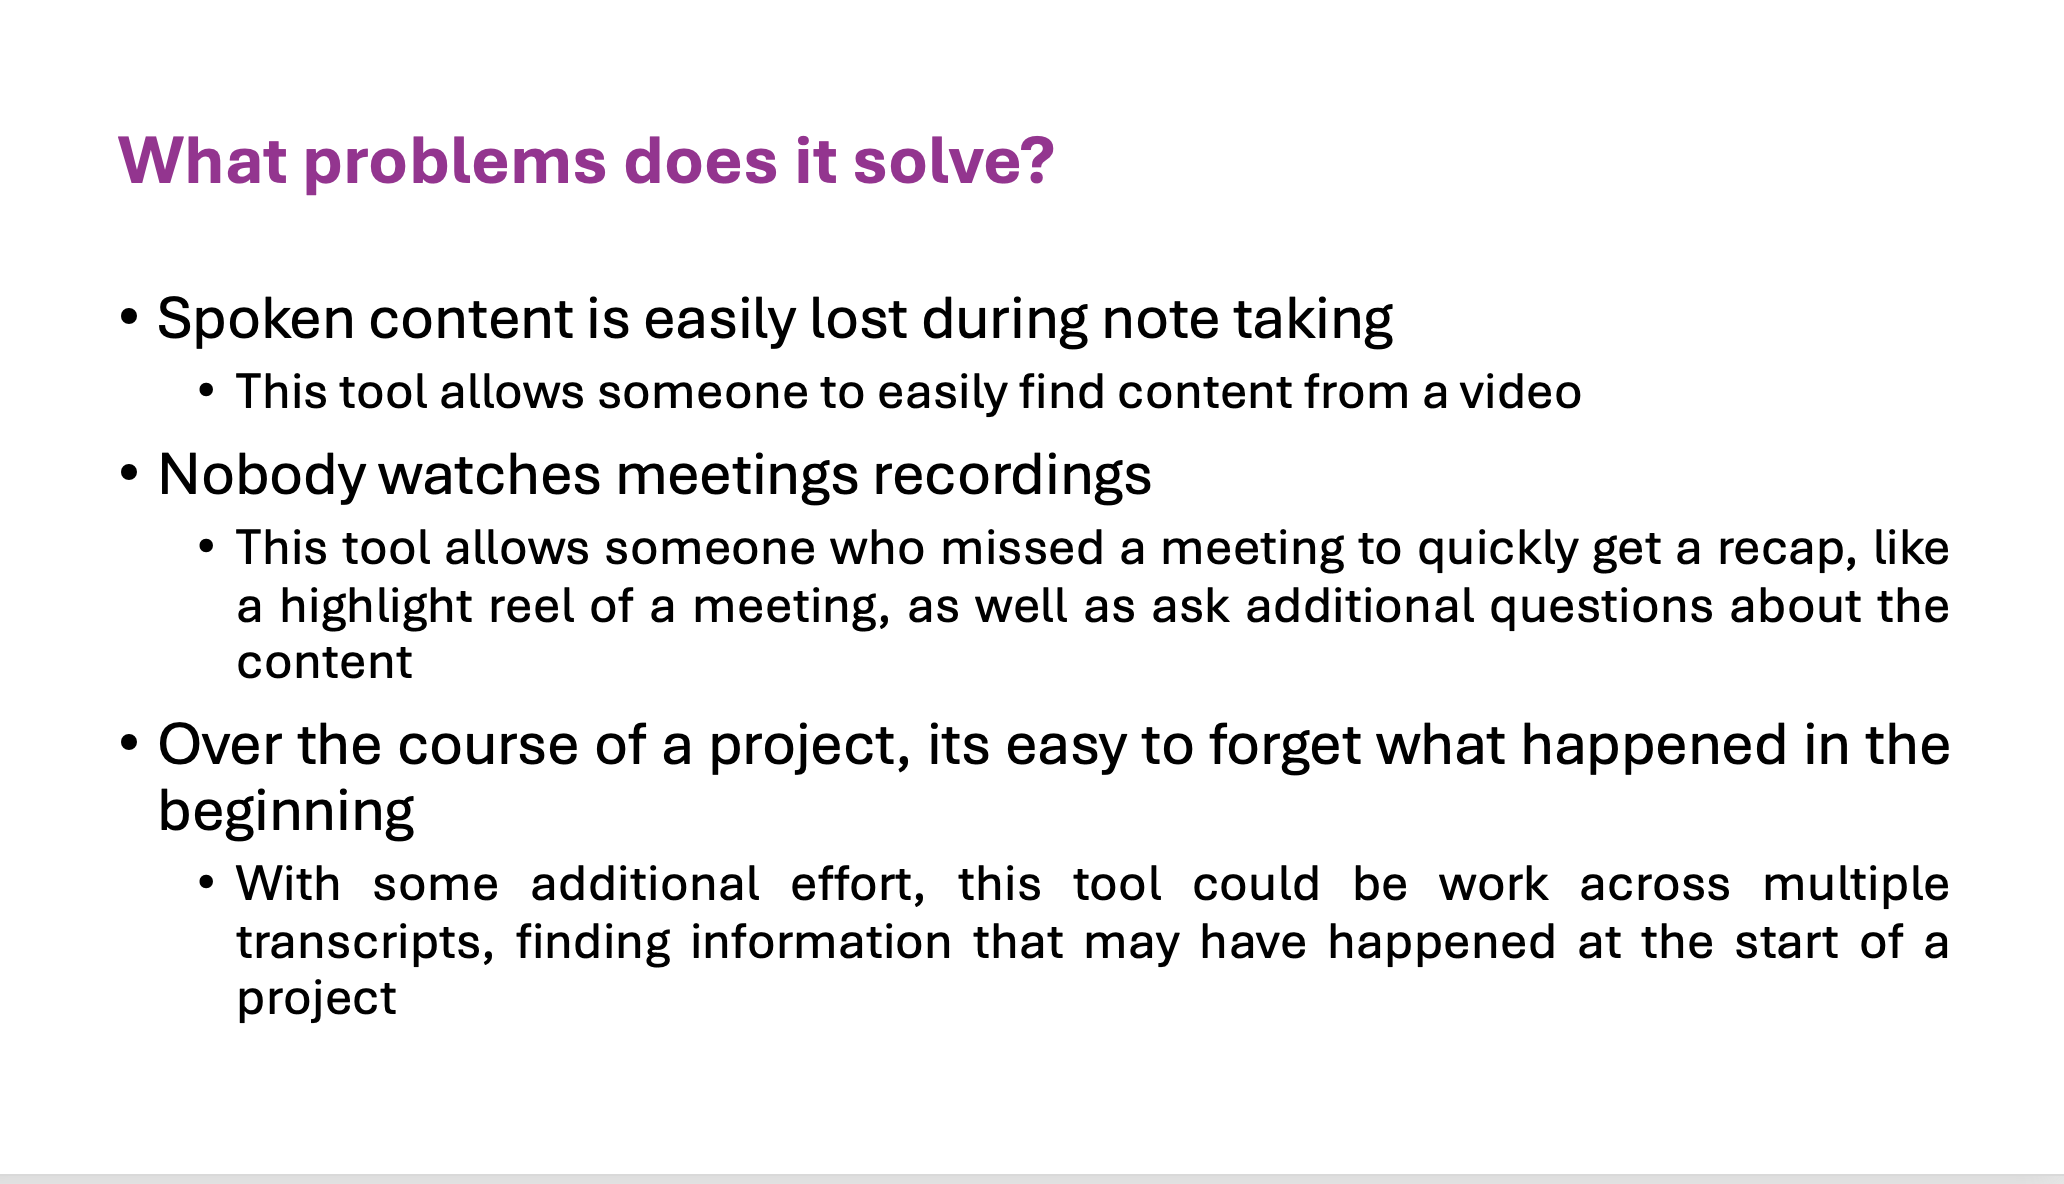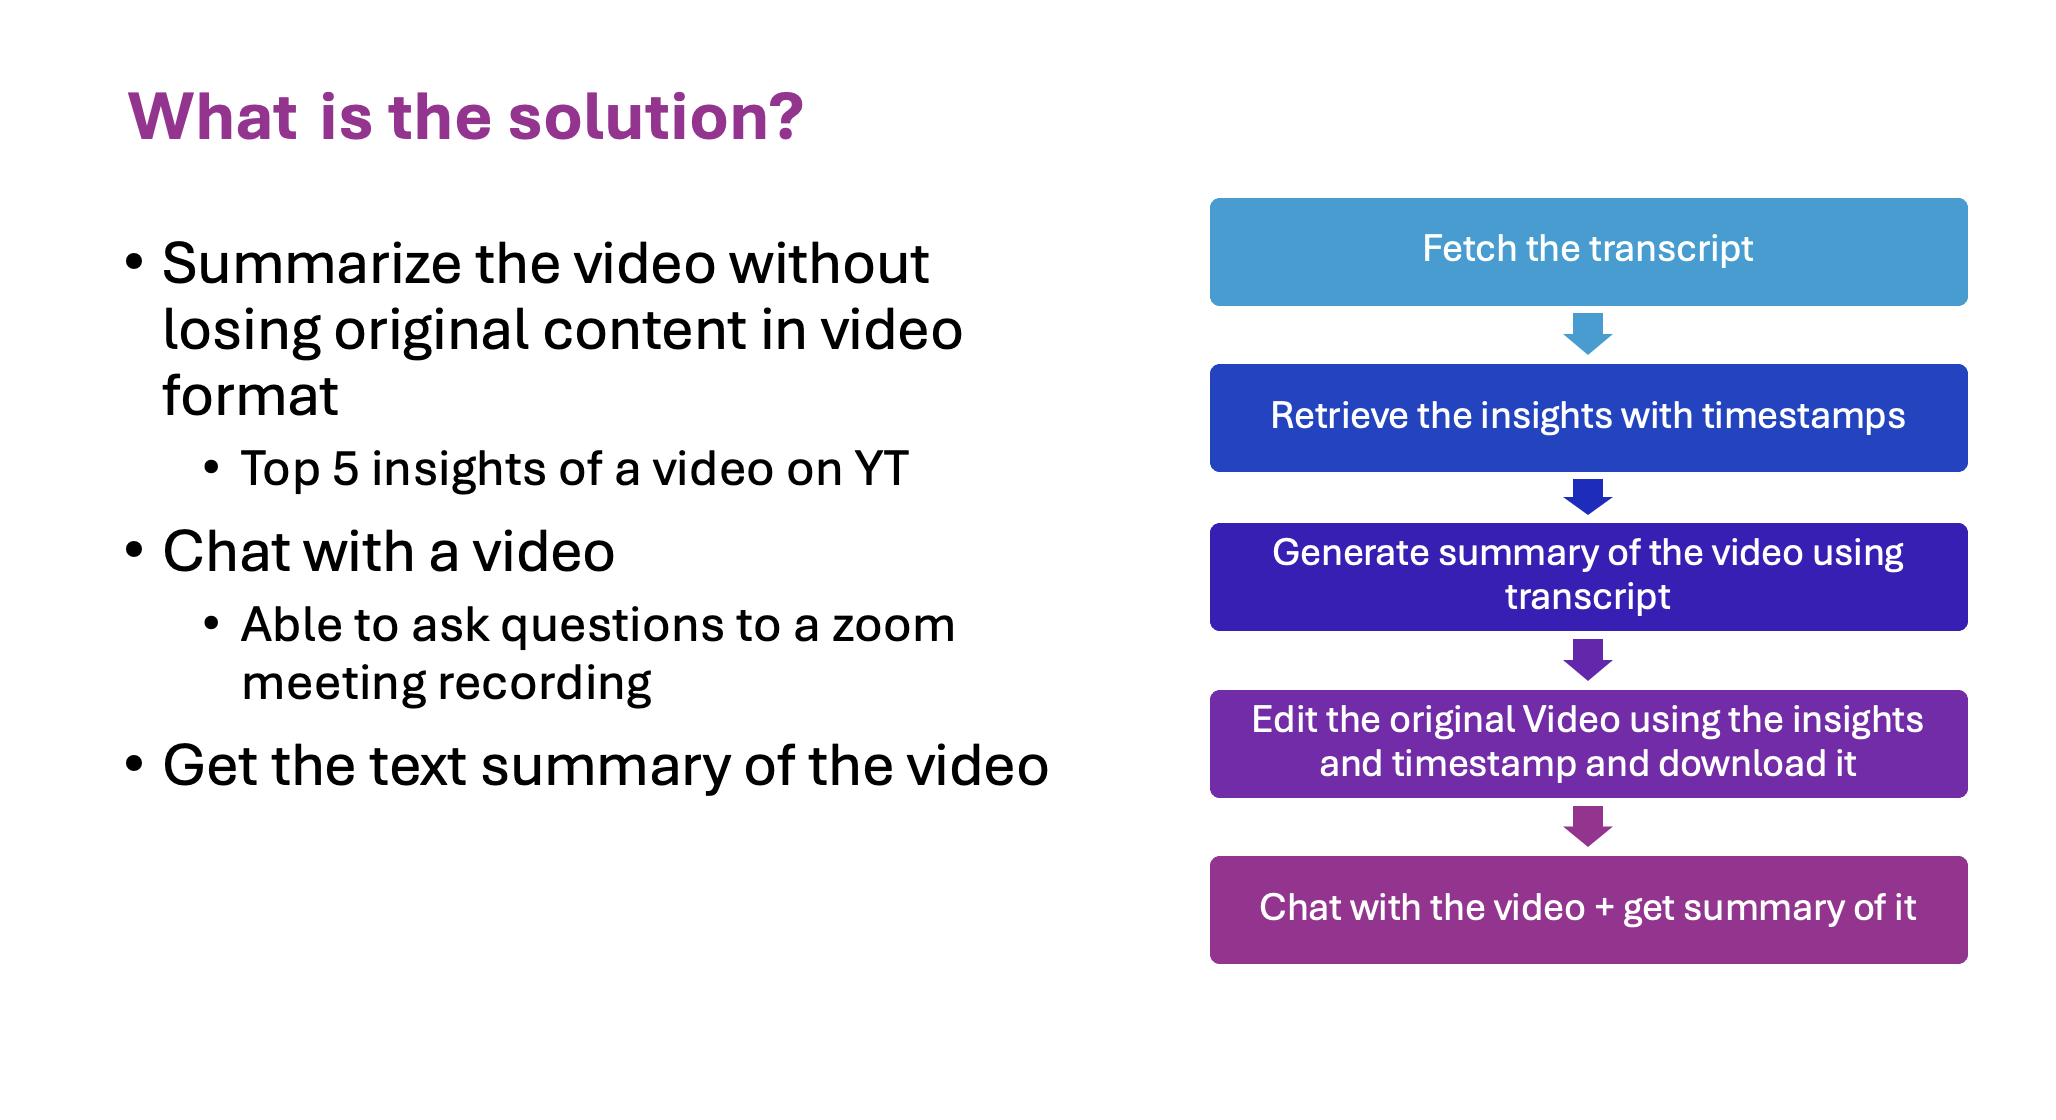

In [ ]:
!pip install youtube-transcript-api
!pip install -U langchain-community pypdf langchain-openai
!pip install --upgrade --quiet  pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 961.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB

---
#Fetch the transcript





In [ ]:
from IPython.display import YouTubeVideo
from langchain.document_loaders import YoutubeLoader
loader = YoutubeLoader.from_youtube_url("https://www.youtube.com/watch?v=RKmCvl7dGFo")
transcript = loader.load()

In [ ]:
print(transcript)

[Document(metadata={'source': 'RKmCvl7dGFo'}, page_content="[Music] one aspect of managing up is just being in constant and regular touch with your management about understanding what they want making them understand what's going on with your business or product so for instance one aspect of managing up in this context is sending regular status updates and that is something earlier in my career I didn't feel like I needed to do cuz I hate them frankly I hate writing status updates and that's just not me there are people who love writing status updates there's no right or wrong I'm not saying that it's wrong to write status updates I just dislike it the reason I dislike it is actually because I have ingrained the LNO framework and in my mind a status update is rarely an L task or at least it was I'll tell you how my thinking changed on this but a status update was rarely an L task usually an end task and often enough an O task so I'm like why am I spending time on this when I have six o

In [ ]:
from langchain_community.document_loaders.youtube import TranscriptFormat

loader = YoutubeLoader.from_youtube_url(
    "https://www.youtube.com/watch?v=RKmCvl7dGFo",
    add_video_info=True,
    transcript_format=TranscriptFormat.CHUNKS,
    chunk_size_seconds=30,
)
transcript1 = loader.load()
print("\n\n".join(map(repr, loader.load())))
#print(transcript1)


Document(metadata={'source': 'https://www.youtube.com/watch?v=RKmCvl7dGFo&t=0s', 'title': 'A Masterclass on Managing Up', 'description': 'Unknown', 'view_count': 7934, 'thumbnail_url': 'https://i.ytimg.com/vi/RKmCvl7dGFo/hq720.jpg', 'publish_date': '2024-08-20 00:00:00', 'length': 698, 'author': 'Shreyas Doshi', 'start_seconds': 0, 'start_timestamp': '00:00:00'}, page_content="[Music] one aspect of managing up is just being in constant and regular touch with your management about understanding what they want making them understand what's going on with your business or product so for instance one aspect of managing up in this context is sending regular status updates and that is something earlier in my career I didn't feel like I needed to")

Document(metadata={'source': 'https://www.youtube.com/watch?v=RKmCvl7dGFo&t=30s', 'title': 'A Masterclass on Managing Up', 'description': 'Unknown', 'view_count': 7934, 'thumbnail_url': 'https://i.ytimg.com/vi/RKmCvl7dGFo/hq720.jpg', 'publish_date'

---
# Find important insights from the Youtube video transcript with timestamp

In [ ]:
!pip install openai

In [ ]:
from google.colab import userdata
open_ai_key = userdata.get('open_ai_key')

In [ ]:
import openai
import os

# Set up OpenAI API key
openai.api_key = open_ai_key

def highlight_key_points(transcript):
  #  try:
        response = openai.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are an AI assistant that highlights 5 most important points in a transcript without summarizing or rewriting. Output the original text with start timestamp in HH:MM:SS , end  timestamp in HH:MM:SS and key points in a table along with the in seperate columns. Provide full sentences spoken by the speaker and do not have abrupt endings. Think hard and deep. You cannot auto generate the timestamps, it has to be from the transcript. Your start and end time should not exceed 10 minutes. The total should not be greater than 5 minutes. Please keep this consise and short"},
                {"role": "user", "content": f"Highlight the key points in this transcript without summarizing or rewriting:\n\n{transcript}"}
            ],
            temperature=0,
            max_tokens=1000
        )

       # highlighted_transcript = response.choices[0].message['content']
        highlighted_transcript =response.choices[0].message.content
        return highlighted_transcript

   # except Exception as e:
        #return f"An error occurred: {str(e)}"


result = highlight_key_points(transcript)
print(result)

| Start Time | End Time | Key Points |
|------------|----------|-----------|
| 00:00:25   | 00:01:45 | Managing up involves staying in touch with management, sending regular status updates, and delegating tasks to team members based on their strengths and preferences. |
| 00:03:12   | 00:04:20 | It is important to escalate issues to management when needed and proactively share the difficult aspects of your job to ensure they understand the challenges you face. |
| 00:04:45   | 00:05:45 | Aligning your product with management's priorities, actively soliciting their concerns, and realigning strategies accordingly are crucial aspects of managing up. |
| 00:06:10   | 00:07:15 | Understanding your manager's goals, being aware of company trends, and shielding your team from irrelevant initiatives are key considerations in managing up effectively. |
| 00:07:40   | 00:08:45 | Balancing complete alignment with management's priorities with the potential costs to your product or team is a critica

In [ ]:
result1 = highlight_key_points(transcript1)
print(result1)

| Start Time | End Time | Key Points |
|------------|----------|------------|
| 00:00:00 | 00:00:30 | One aspect of managing up is staying in touch with your management and providing regular status updates. |
| 00:01:00 | 00:01:30 | Initially, the speaker disliked writing status updates as they felt it was not a priority task for them. |
| 00:02:30 | 00:03:00 | Delegating tasks to team members who enjoy them can be an effective way to manage workload and preferences within the team. |
| 00:03:30 | 00:04:00 | It is important to communicate effectively with management and share challenges proactively to ensure they understand the difficulties faced in the role. |
| 00:05:00 | 00:05:30 | Aligning your product and priorities with management's goals and actively seeking their input can help in managing up effectively. |


Convert the start and end time into timestamp pairs

In [ ]:
import re
from datetime import datetime, timedelta

def time_to_seconds(time_str):
    match = re.match(r"(\d{2}):(\d{2}):(\d{2})", time_str)
    if match:
        hours, minutes, seconds = map(int, match.groups())
        return hours * 3600 + minutes * 60 + seconds
    else:
        print(f"Invalid time format: {time_str}")
        return None

def process_transcript(transcript):
    timestamp_pairs = []
    lines = transcript.split('\n')  # Split the input string into lines

    for line in lines[2:]:  # Skip the header rows
        columns = line.split('|')
        if len(columns) >= 3:
            start_time_str = columns[1].strip()
            end_time_str = columns[2].strip()

            start_seconds = time_to_seconds(start_time_str)
            end_seconds = time_to_seconds(end_time_str)

            if start_seconds is not None and end_seconds is not None:
                timestamp_pairs.append({
                    'start_time': start_seconds,
                    'end_time': end_seconds
                })

    return timestamp_pairs


timestamp_pairs = process_transcript(result)
print(timestamp_pairs)

[{'start_time': 25, 'end_time': 105}, {'start_time': 192, 'end_time': 260}, {'start_time': 285, 'end_time': 345}, {'start_time': 370, 'end_time': 435}, {'start_time': 460, 'end_time': 525}]


---
#Unable to programatically download a youtube video so I downloaded the video from YT and uploaded here and will be edited



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving videoplayback.mp4 to videoplayback.mp4


---
#Edit the original Video using the insights and timestamp and download it


In [ ]:
!pip install moviepy opencv-python

In [ ]:
from moviepy.editor import VideoFileClip, concatenate_videoclips, ColorClip, TextClip, CompositeVideoClip, ImageClip
import numpy as np

def create_text_clip(text, size, duration, fps):
    fontsize = int(size[1] / 3)  # Increase fontsize to cover approximately 1/3 of the screen height
    print(fontsize)

    try:
        # Try using TextClip
        txt_clip = TextClip(text, fontsize=fontsize, color='Red', font='Calibri', size=size)
    except:
        # If TextClip fails, create a numpy array with text
        from PIL import Image, ImageDraw, ImageFont
        img = Image.new('RGB', size, color=(0, 0, 0))
        draw = ImageDraw.Draw(img)
        try:
            font = ImageFont.truetype("Arial.ttf", fontsize)
        except:
            font = ImageFont.load_default()
        text_width, text_height = draw.textsize(text, font=font)
        position = ((size[0] - text_width) // 2, (size[1] - text_height) // 2)
        draw.text(position, text, font=font, fill=(255, 255, 0))
        txt_clip = ImageClip(np.array(img))

    # Set position and duration
    txt_clip = txt_clip.set_position('center').set_duration(duration)

    # Add fade in and out effect
    fade_duration = min(duration / 4, 1)  # Fade duration is 1/4 of clip duration or 1 seconds, whichever is shorter
    txt_clip = txt_clip.fadeout(fade_duration).fadein(fade_duration)

    # Add a simple "floating" effect
    def move_function(t):
        return ('center', 540 + 20 * np.sin(2 * np.pi * t / duration))

    txt_clip = txt_clip.set_position(move_function)

    return txt_clip

def crop_video(input_file, timestamp_pairs, preview=False):
    video = VideoFileClip(input_file)
    print(timestamp_pairs)
    segments = []
    text = f"Insight 1"
    print(text)
    txt_clip = create_text_clip(text, (video.w, video.h), 2, video.fps)
    segments.append(txt_clip)

    for i, pair in enumerate(timestamp_pairs):
        start_seconds = pair['start_time']
        end_seconds = pair['end_time']
        print(f"Cropping segment from {start_seconds} to {end_seconds} seconds")
        segment = video.subclip(start_seconds, end_seconds)
        segments.append(segment)

        if i < len(timestamp_pairs) - 1:
            text = f"Insight {i+2}"
            print(text)
            txt_clip = create_text_clip(text, (video.w, video.h), 2, video.fps)
            segments.append(txt_clip)

    final_clip = concatenate_videoclips(segments)

    if preview:
        # Create a preview of the first 10 seconds
        preview_duration = min(10, final_clip.duration)
        preview_clip = final_clip.subclip(0, preview_duration)
        preview_clip.write_videofile("preview.mp4", codec="libx264", audio_codec="aac")
        print("Preview saved as 'preview.mp4'. Please check this file before proceeding.")
    else:
        final_clip.write_videofile("cropped_video_with_pauses_and_text.mp4", codec="libx264", audio_codec="aac")

    video.close()
    final_clip.close()

# Example usage
input_file = "videoplayback.mp4"
#timestamp_pairs= [{'start_time': 0, 'end_time': 90}, {'start_time': 90, 'end_time': 180}, {'start_time': 180, 'end_time': 270}, {'start_time': 270, 'end_time': 360}, {'start_time': 450, 'end_time': 540}]


# First, create a preview
crop_video(input_file, timestamp_pairs, preview=False)

# After checking the preview, if it looks good, run it again to create the final video
# crop_video(input_file, timestamp_pairs, preview=False)

  text_width, text_height = draw.textsize(text, font=font)



[{'start_time': 25, 'end_time': 105}, {'start_time': 192, 'end_time': 260}, {'start_time': 285, 'end_time': 345}, {'start_time': 370, 'end_time': 435}, {'start_time': 460, 'end_time': 525}]
Insight 1
120
Cropping segment from 25 to 105 seconds


  text_width, text_height = draw.textsize(text, font=font)

  text_width, text_height = draw.textsize(text, font=font)



Insight 2
120
Cropping segment from 192 to 260 seconds
Insight 3
120
Cropping segment from 285 to 345 seconds


  text_width, text_height = draw.textsize(text, font=font)



Insight 4
120
Cropping segment from 370 to 435 seconds


  text_width, text_height = draw.textsize(text, font=font)



Insight 5
120
Cropping segment from 460 to 525 seconds
Moviepy - Building video cropped_video_with_pauses_and_text.mp4.
MoviePy - Writing audio in cropped_video_with_pauses_and_textTEMP_MPY_wvf_snd.mp4


MoviePy - Done.
Moviepy - Writing video cropped_video_with_pauses_and_text.mp4



Moviepy - Done !
Moviepy - video ready cropped_video_with_pauses_and_text.mp4


Download the edited video

In [ ]:
#files.download('preview.mp4')

In [ ]:
files.download('cropped_video_with_pauses_and_text.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Chat with Video

In [ ]:
!pip install llama-index

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.2/180.2 kB 8.9 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1


In [ ]:
from llama_index.core import VectorStoreIndex, SimpleDirectoryReader
from llama_index.core import Document

# Extract text from the transcript list
document_text = ""
for doc in transcript:
    document_text += doc.page_content  # Access the 'page_content' attribute of each Document object
documents = [Document(text=document_text)]
print(document_text)
index = VectorStoreIndex.from_documents(documents)

[Music] one aspect of managing up is just being in constant and regular touch with your management about understanding what they want making them understand what's going on with your business or product so for instance one aspect of managing up in this context is sending regular status updates and that is something earlier in my career I didn't feel like I needed to do cuz I hate them frankly I hate writing status updates and that's just not me there are people who love writing status updates there's no right or wrong I'm not saying that it's wrong to write status updates I just dislike it the reason I dislike it is actually because I have ingrained the LNO framework and in my mind a status update is rarely an L task or at least it was I'll tell you how my thinking changed on this but a status update was rarely an L task usually an end task and often enough an O task so I'm like why am I spending time on this when I have six other clear L tasks to do and they are also more fun for me s

In [ ]:
query_engine = index.as_query_engine(chat_mode="openai", verbose=True)

In [ ]:
def generate_response(prompt):
    #response = chat_engine.chat(prompt)
    response = query_engine.query(prompt)
   #print(response)
    return response

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Define the interactive chat function
def run_interactive_chat():
    input_box = widgets.Text(placeholder='Type your question here...')
    output_area = widgets.Output()

    def on_submit(sender):
        question = input_box.value
        if question.lower() == 'exit':
            print("Goodbye!")
            return
        with output_area:
            clear_output(wait=True)
            prompt = f"Answer the following question based on the provided transcript and keep it in speakers language as much as you can. Keep it short and consise. If the question is not related to the context provided please reply I dont know:\n{question}"
            print(question)
            response = generate_response(prompt)
            print("Response:", response)
        input_box.value = ''

    input_box.on_submit(on_submit)
    display(input_box, output_area)

# Run the interactive chat
run_interactive_chat()

Text(value='', placeholder='Type your question here...')

Output()

In [ ]:
!pip install pypdf

# Summarize the video

In [ ]:
def summarize_document(document_text):
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": f"Summarize the following document in 5 bullet points:\n\n{document_text}"}],
        max_tokens=150,
        temperature=0.5,
        n=1,
        stop=None)
    summary = response.choices[0].message.content.strip()
    return summary

# Extract text from the transcript list
document_text = ""
for doc in transcript:
    document_text += doc.page_content  # Access the 'page_content' attribute of each Document object

# Call the summarization function
summary = summarize_document(document_text)
print(summary)

- Managing up involves staying in constant communication with your management, including sending regular status updates
- It is important to escalate issues and communicate challenges to your management, even if you have high agency and confidence in solving problems
- Aligning your product and team with your management's priorities is crucial, even if it means adapting to changing priorities
- Understanding and actively soliciting your management's goals and priorities is key to successful alignment
- Sometimes, aligning with management priorities may involve minor tasks that do not directly impact your team, but it is important to consider the cost and benefits of complete alignment.


Challenges:


1.   Hallucination
2.   Performance